In [16]:
#Fitting Brush model

import numpy as np
import matplotlib.pyplot as plt

import Brush as br
import Pacejka52 as pa

Fz = 4000
mu = 0.8
lt = 0.2
kt = 360000
lam = 0.04

Sx = np.linspace(0,1,1000)
Sy = np.linspace(-0.3,0.3,1000)

params_Fx_init = [0.8, 360000, 0.04] # mu, kt, lamd
params_Fy_init = [0.8, 50000] # mu, Ca


Text(0, 0.5, 'Fy [N]')

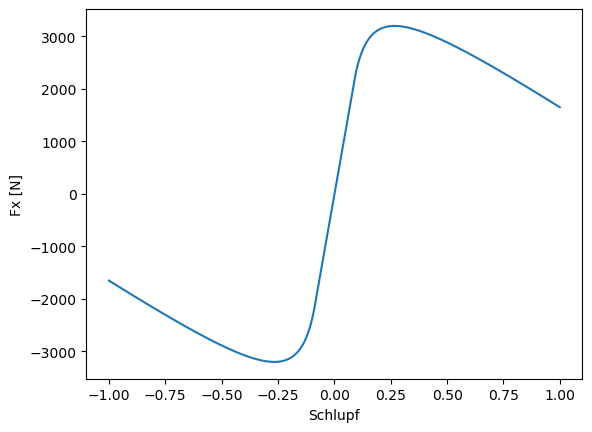

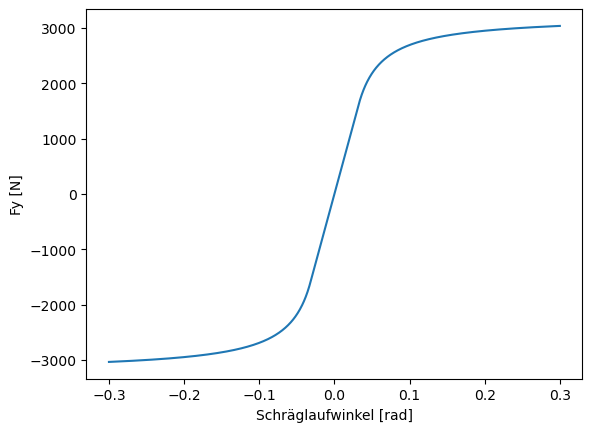

In [3]:
#Plots init params

plt.figure(1)
Fx = br.brush_long(Sx,Fz, *params_Fx_init)
plt.plot(Sx,Fx)
plt.xlabel("Schlupf")
plt.ylabel("Fx [N]")

plt.figure(2)
Fy = br.Brush_lat(Sy,Fz, * params_Fy_init)
plt.plot(Sy,Fy)
plt.xlabel("Schräglaufwinkel [rad]")
plt.ylabel("Fy [N]")

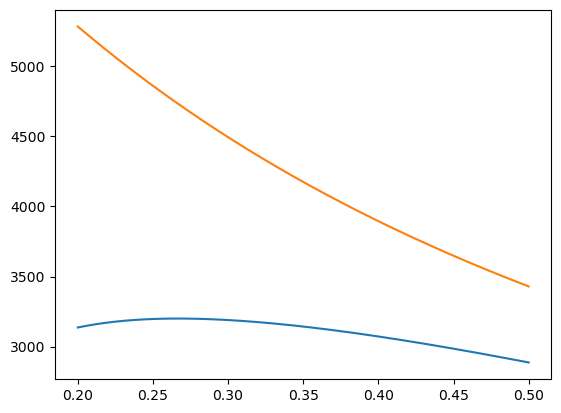

In [29]:
#Fitting
import scipy.optimize as opt
from scipy.optimize import curve_fit
#Pacejka 52
IA = 0
Fz0 = 3114

Sx = np.linspace(0.2,0.5,1000)
Sy = np.linspace(-0.3,0.3,1000)

params_Fx_init = [0.8, 360000, 0.04] # mu, kt, lamd
params_Fy_init = [0.8, 50000] # mu, Ca

Fx_pa = pa.Pacejka52_long(Fz,Sx,IA,Fz0)[0]
Fy_pa = pa.Pacejka52_lat(Fz,Sy,IA,Fz0)[0]


def Fx_br_func(Sx,mu,kt,lam):
    return br.brush_long(Sx,Fz, *params_Fx_init)

#def Fy_br_func(Sy, mu, Ca):
#    return br.brush_lat(Sy,Fz, *params_Fy_init)

Fx_br_params, _ = curve_fit(Fx_br_func, Sx, Fx_pa, params_Fx_init)
#Fy_br_params, _ = curve_fit(Fy_br_func, Sy, Fy_pa, params_Fy_init,maxfev = 10000)

Fx_br_fit = Fx_br_func(Sx,Fx_br_params[0],Fx_br_params[1],Fx_br_params[2])
#Fy_br_fit = Fy_tm_func(Sy,Fy_br_params[0],Fy_br_params[1])

plt.figure(1)
plt.plot(Sx,Fx_br_fit)
plt.plot(Sx,Fx_pa)
